<a href="https://colab.research.google.com/github/nastosimys/Machine_learning_2025/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №4.**

**0. Описание задачи**

Таблица содержит данные о 100000 людей. Для каждого человека указаны его возраст, пол, место проживания, раса, история курения, индекс массы тела, уровень сахара и глюкозы в крови, наличие гипертонии, сердечно-сосудистых заболеваний и диабета. Требуется построить модель классификации, которая будет предсказывать наличие диабета.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

**1. Чтение данных**

In [2]:
url = 'https://raw.githubusercontent.com/nastosimys/Machine_learning/refs/heads/main/diabetes_dataset.csv'
data_raw = pd.read_csv(url)
data_raw.replace("No Info", np.nan, inplace=True)
data_raw.replace("Other", np.nan, inplace=True)

Найдём размеры таблицы: количество строк (каждая строка соответствует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(100000, 16)

In [ ]:
data_raw

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,NaN,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


Обобщённая информация о данных:

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                99982 non-null   object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       64184 non-null   object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Столбцы (признаки) имеют имена:

* `year` - год сбора данных
* `gender` - пол человека
* `age` - возраст человека (в годах)
* `location` - штат или регион, в котором проживает человек
* `race:AfricanAmerican` - является ли человек афроамериканцем (0 - нет, 1 - есть)
* `race:Asian` - принадлежность к монголоидной расе (0 - нет, 1 - есть)
* `race:Caucasian` - принадлежность к европеоидной расе (0 - нет, 1 - есть)
* `race:Hispanic` - является ли человек латиноамериканцем (0 - нет, 1 - есть)
* `race:Other` - другая расовая принадлежность (0 - нет, 1 - есть)
* `hypertension` - наличие гипертонии (0 - нет, 1 - есть)
* `heart_disease` - наличие сердечных заболеваний (0 - нет, 1 - есть)
* `smoking_history` - история курения человека
* `bmi` - индекс массы тела человека
* `hbA1c_level` - уровень HbA1c (показатель уровня сахара в крови с течением времени)
* `blood_glucose_level` - уровень глюкозы в крови (в мг/дл)
* `diabetes` - наличие у человека диабета (0 - нет, 1 - есть)


Признаки `gender`, `location` и `smoking_history` - категориальные, остальные признаки - числовые.

In [3]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['location'] = data_raw['location'].astype('category')
data_raw['smoking_history'] = data_raw['smoking_history'].astype('category')

In [4]:
data_raw['gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [5]:
data_raw['location'].dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware',
                  'District of Columbia', 'Florida', 'Georgia', 'Guam',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'United States',
                  'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
                  'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [6]:
data_raw['smoking_history'].dtype

CategoricalDtype(categories=['current', 'ever', 'former', 'never', 'not current'], ordered=False, categories_dtype=object)

**2. Визуализация данных и вычисление основных характеристик**

Информация о числовых признаках:

In [ ]:
data_raw.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Метод `data_raw.describe()` используется для получения сводной информации о числовых признаках.

* `count` - количество значений
* `mean` - среднее значение
* `std` - разброс по этим значениям
* `min` - минимальное значение
* `25%` - первый квартиль
* `50%` - второй квартиль (медиана)
* `75%` - третий квартиль
* `max` - максимальное значение

Информация о категориальных признаках:

In [ ]:
data_raw.describe(include=['category'])

,gender,location,smoking_history
count,99982,100000,64184
unique,2,55,5
top,Female,Kentucky,never
freq,58552,2038,35095


Метод `data_raw.describe(include=['category'])` используется для получения информации о категориальных признаках.

* `count` - количество значений
* `unique` - количество значений, которое принимает переменная
* `top` - мода (самое распространённое значение)
* `freq` - количество объектов с самым частым значением

Визуализация:

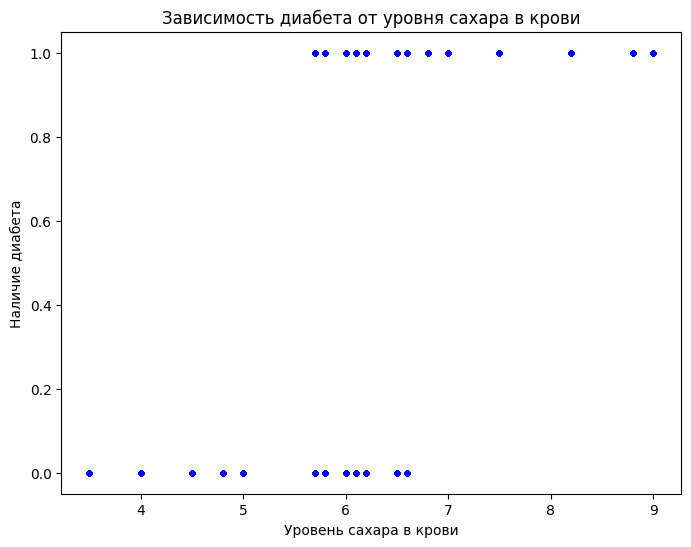

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_raw['hbA1c_level'], data_raw['diabetes'], s=8, c='blue')
plt.xlabel('Уровень сахара в крови')
plt.ylabel('Наличие диабета')
plt.title('Зависимость диабета от уровня сахара в крови')
plt.show()

Чем выше уровень сахара в крови, тем вероятнее наличие диабета.

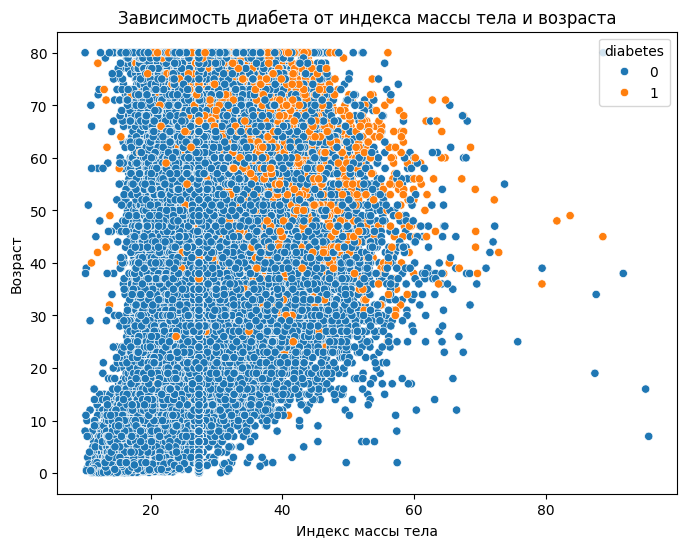

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='age', hue='diabetes', data=data_raw)
plt.xlabel('Индекс массы тела')
plt.ylabel('Возраст')
plt.title('Зависимость диабета от индекса массы тела и возраста')
pass

Чем больше возраст и индекс массы тела, тем больше вероятность наличия диабета.

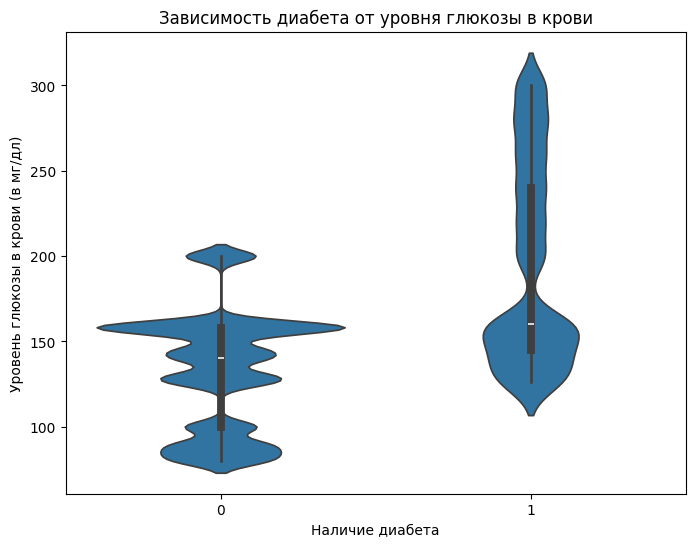

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="diabetes", y="blood_glucose_level", data=data_raw)
plt.xlabel('Наличие диабета')
plt.ylabel('Уровень глюкозы в крови (в мг/дл)')
plt.title('Зависимость диабета от уровня глюкозы в крови')
pass

Чем больше уровень глюкозы в крови, тем выше вероятность наличия диабета.

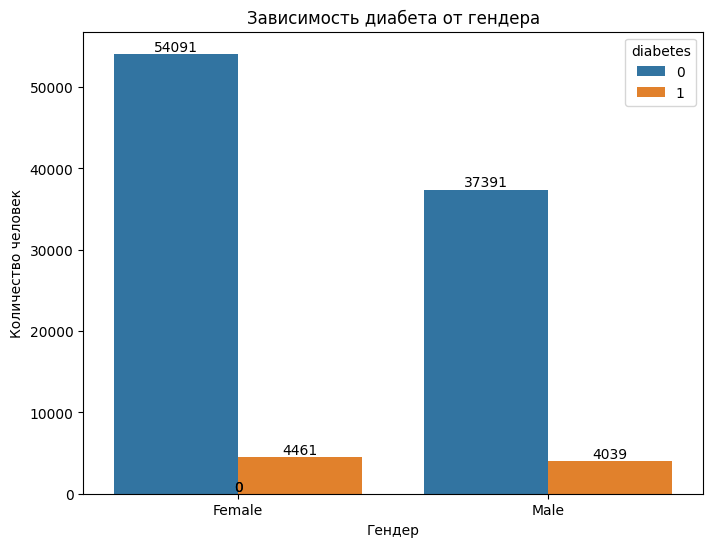

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='diabetes', data=data_raw)
plt.xlabel('Гендер')
plt.ylabel('Количество человек')
plt.title('Зависимость диабета от гендера')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Среди опрошенных женщин диабетом больны 7,6%, среди мужчин - 9,75%.

Все диаграммы рассеивания:

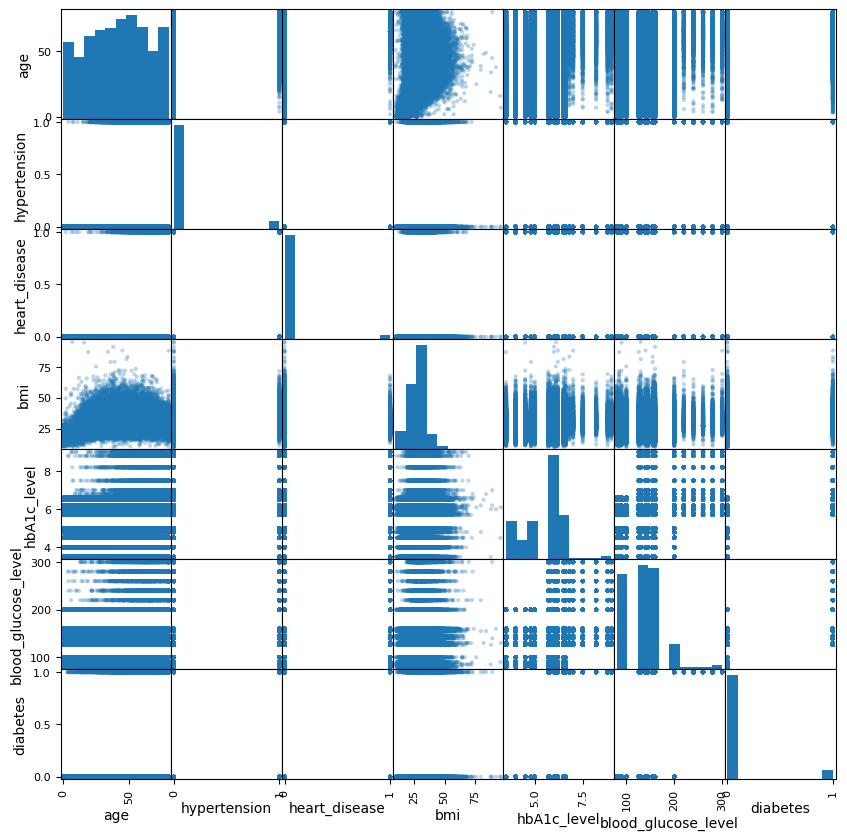

In [ ]:
pd.plotting.scatter_matrix(data_raw[['age', 'hypertension', 'heart_disease', 'bmi',	'hbA1c_level',	'blood_glucose_level',	'diabetes']], alpha=.3, figsize=(10, 10))
plt.show()

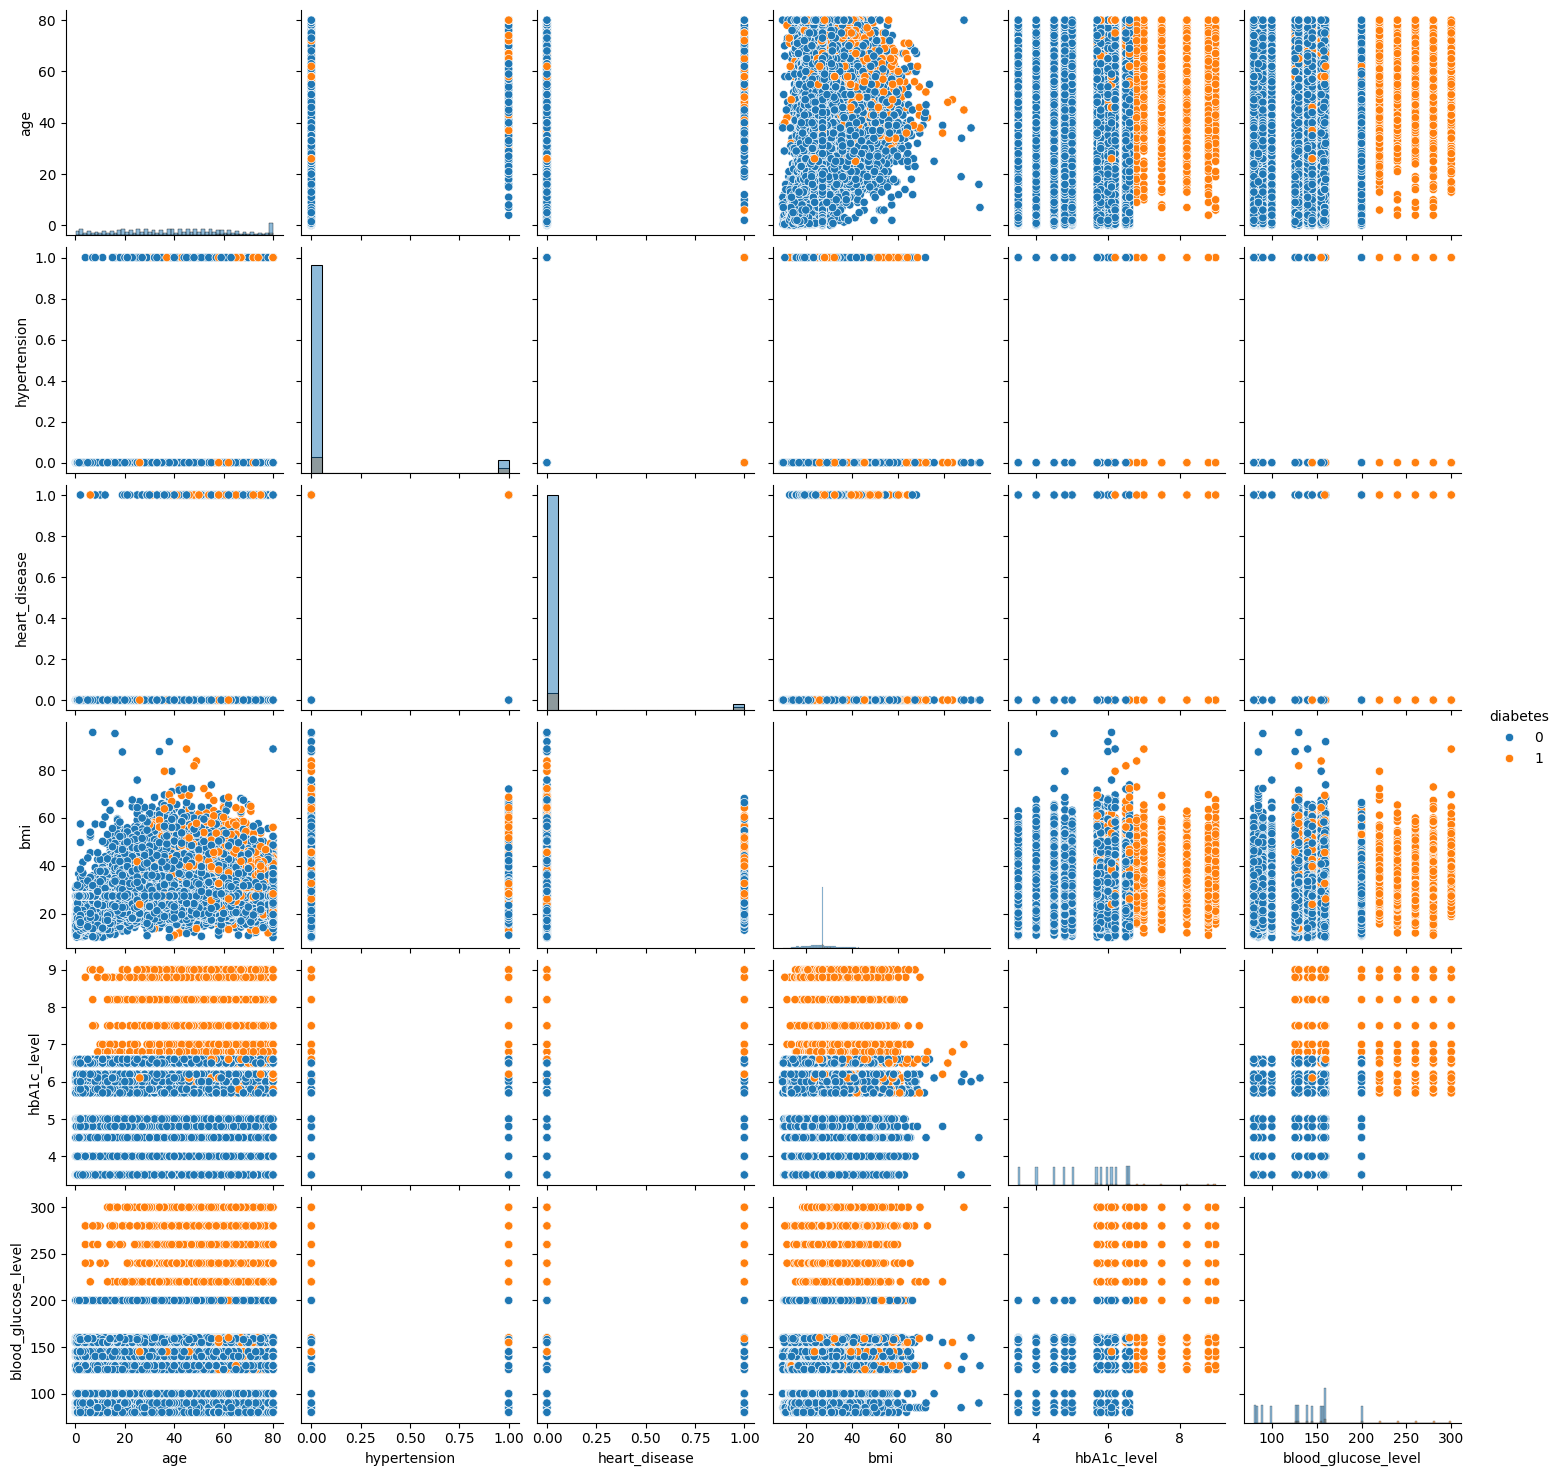

In [ ]:
sns.pairplot(data_raw[['age', 'hypertension', 'heart_disease', 'bmi',	'hbA1c_level',	'blood_glucose_level',	'diabetes']], hue='diabetes', diag_kind='hist')
pass

Оранжевым цветом выделено наличие диабета, синим - его отсутствие.

Ящик с усами (бокс-диаграмма) и квартиль:

Ящик с усами (бокс-диаграмма) - один из способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-ому и 3-ему квартилям, а горизонтальная линия внутри ящика - медиане. Значения за пределами усов изображаются в виде отдельных точек. Их можно считать выбросами.

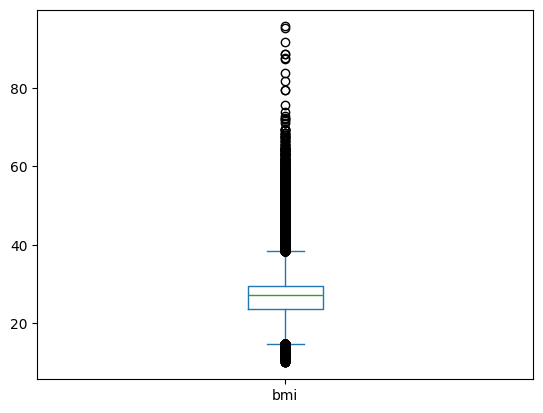

In [ ]:
data_raw['bmi'].plot(kind='box')
pass

In [ ]:
data_raw['bmi'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,bmi
0.005,13.8900
0.010,14.6000
0.050,16.8200
0.100,19.1800
0.500,27.3200
0.900,35.4700
0.950,39.4900
0.990,48.7901
0.995,52.5000


99% всех значений признака `'bmi'` находится в диапазоне от 13.89 до 52.5.

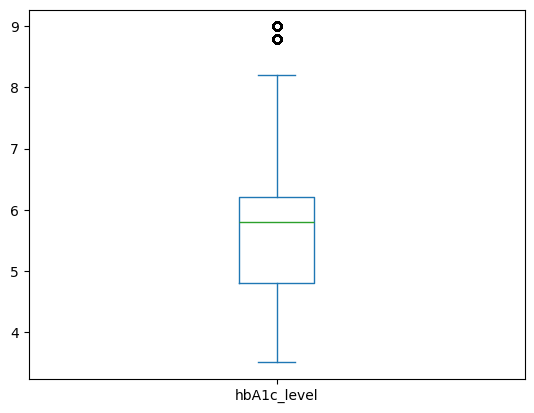

In [ ]:
data_raw['hbA1c_level'].plot(kind='box')
pass

In [ ]:
data_raw['hbA1c_level'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,hbA1c_level
0.005,3.5
0.010,3.5
0.050,3.5
0.100,4.0
0.500,5.8
0.900,6.6
0.950,6.6
0.990,8.8
0.995,9.0


99% всех значений признака `'hbA1c_level'` находится в диапазоне от 3.5 до 9.

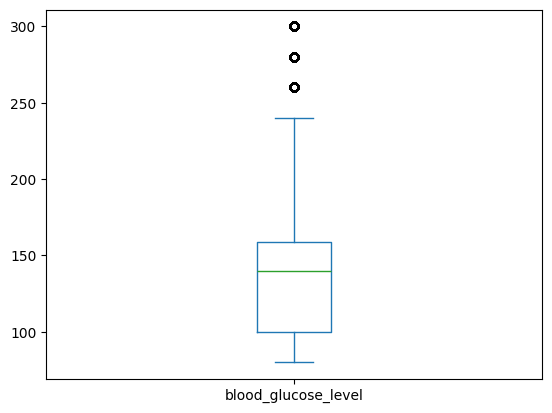

In [ ]:
data_raw['blood_glucose_level'].plot(kind='box')
pass

In [ ]:
data_raw['blood_glucose_level'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,blood_glucose_level
0.005,80.0
0.010,80.0
0.050,80.0
0.100,85.0
0.500,140.0
0.900,200.0
0.950,200.0
0.990,280.0
0.995,300.0


99% всех значений признака `'blood_glucose_level'` находится в диапазоне от 80 до 300 мг/дл.

In [ ]:
data_raw['smoking_history'].value_counts()

,count
smoking_history,
never,35095
former,9352
current,9286
not current,6447
ever,4004


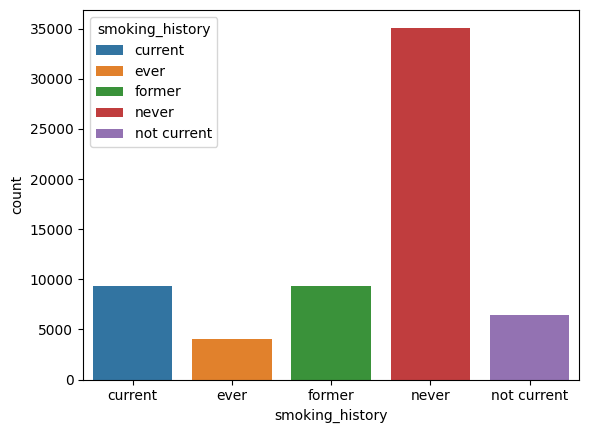

In [ ]:
sns.countplot(x='smoking_history', data=data_raw, hue='smoking_history')
pass

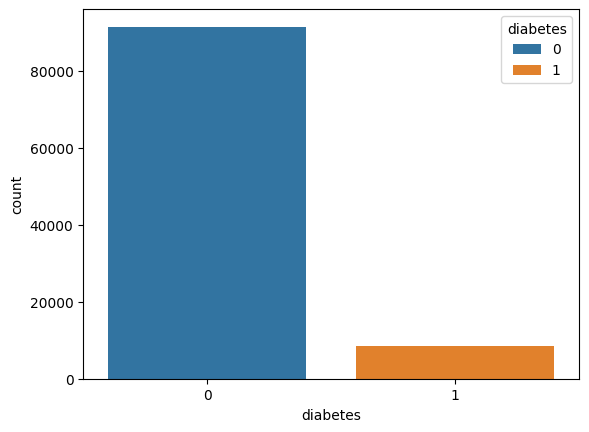

In [ ]:
sns.countplot(x='diabetes', data=data_raw, hue='diabetes')
pass

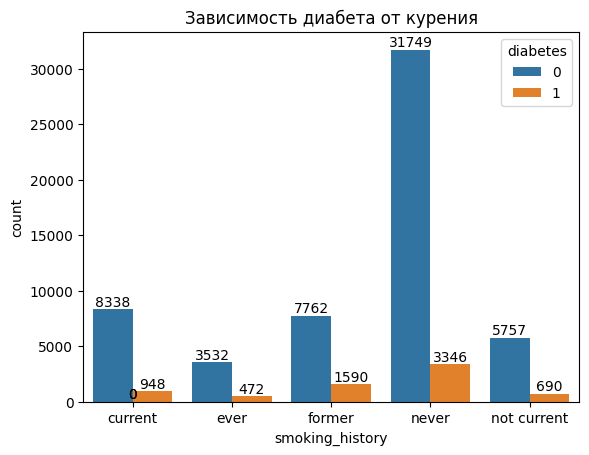

In [ ]:
ax = sns.countplot(x='smoking_history', hue='diabetes', data=data_raw)
plt.title('Зависимость диабета от курения')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Из графика можно сделать вывод, что диабет от курения не зависит.

Интересно также исследовать, есть ли зависимость между расой человека и наличием у него диабета.

In [ ]:
data = data_raw.copy()
data['race:AfricanAmerican'] = data['race:AfricanAmerican'].replace({1: 'AfricanAmerican'})
data['race:Asian'] = data['race:Asian'].replace({1: 'Asian'})
data['race:Caucasian'] = data['race:Caucasian'].replace({1: 'Caucasian'})
data['race:Hispanic'] = data['race:Hispanic'].replace({1: 'Hispanic'})
data['race:Other'] = data['race:Other'].replace({1: 'Other'})
data['race'] = data.apply(lambda row: row['race:AfricanAmerican'] if row['race:AfricanAmerican'] != 0 else
                                     row['race:Asian'] if row['race:Asian'] != 0 else
                                     row['race:Caucasian'] if row['race:Caucasian'] != 0 else
                                     row['race:Hispanic'] if row['race:Hispanic'] != 0 else
                                     row['race:Other'], axis=1)
data = data.drop('race:Other', axis=1)
data = data.drop('race:Hispanic', axis=1)
data = data.drop('race:Caucasian', axis=1)
data = data.drop('race:Asian', axis=1)
data['race:AfricanAmerican'] = data['race']
data = data.drop('race', axis=1)
data = data.rename(columns={'race:AfricanAmerican': 'race'})

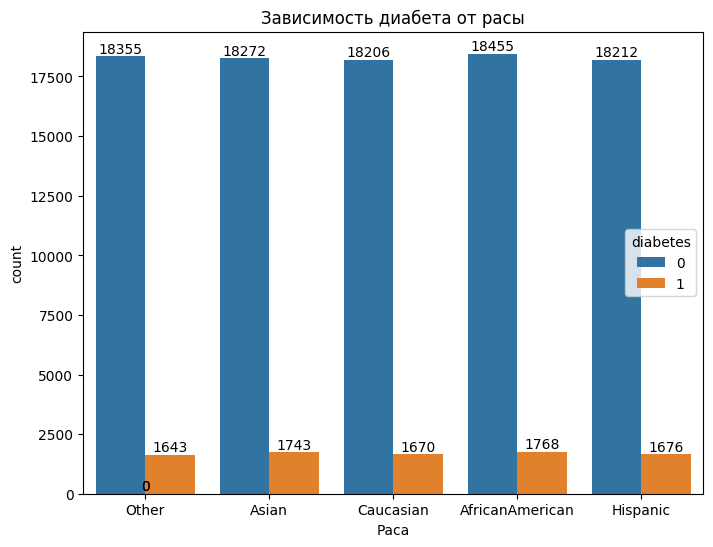

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='race', hue='diabetes', data=data)
plt.xlabel('Раса')
plt.title('Зависимость диабета от расы')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Из исследуемых людей диабет есть у 8.7% азиатов, у 8.4% представителей европеоидной расы, у 8.74% афроамериканцев и у 8.4% латиноамериканцев.

Так как значения практически равны, можно сделать вывод, что раса не оказывает значительного влияния на предрасположенность к диабету.

Матрица корреляций:

Матрица корреляции показывает, как линейно зависимы друг от друга различные переменные в наборе данных.

Корреляция находится в диапазоне от -1 до +1.

* +1:  Полная положительная корреляция. Две переменные изменяются в одном направлении.
* 0: Отсутствие корреляции. Изменения в одной переменной не влияют на изменения в другой.
* -1: Полная отрицательная корреляция. Две переменные изменяются в противоположных направлениях.


In [ ]:
data2 = data_raw.copy()
data2 = data2.drop(['year', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'], axis=1)

In [ ]:
corr_mat = data2.corr(numeric_only=True)
corr_mat

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
hbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


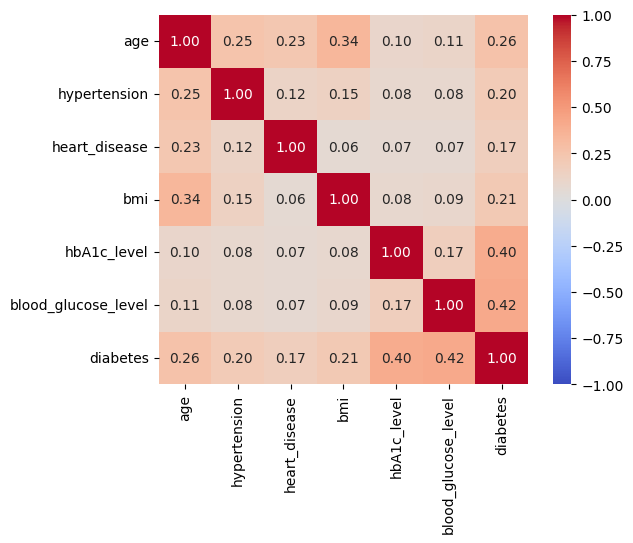

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, которые больше или равны 0.4:

In [ ]:
corr_mat >= 0.4

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
age,True,False,False,False,False,False,False
hypertension,False,True,False,False,False,False,False
heart_disease,False,False,True,False,False,False,False
bmi,False,False,False,True,False,False,False
hbA1c_level,False,False,False,False,True,False,True
blood_glucose_level,False,False,False,False,False,True,True
diabetes,False,False,False,False,True,True,True


In [ ]:
corr_mat.where(np.triu(np.abs(corr_mat) >= 0.4, k=1)).stack().sort_values(ascending=False)

,,0
blood_glucose_level,diabetes,0.419558
hbA1c_level,diabetes,0.400660


Можно сделать вывод, что больше всего наличие диабета зависит от уровня сахара и уровня глюкозы в крови.


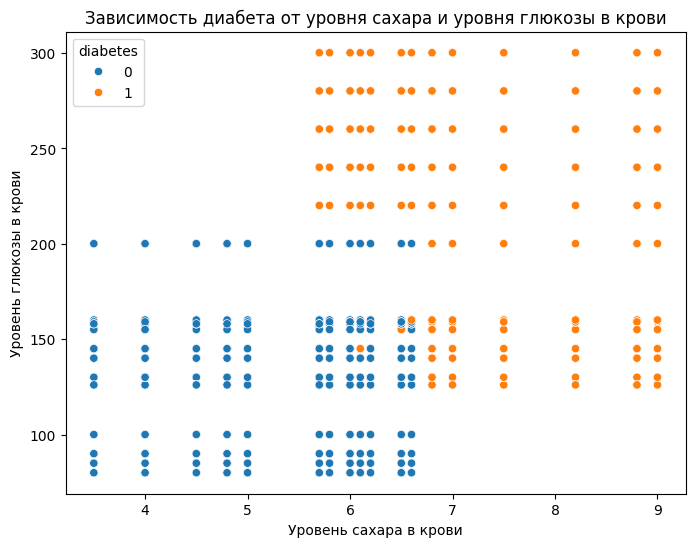

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hbA1c_level', y='blood_glucose_level', hue='diabetes', data=data_raw, alpha=1)
plt.xlabel('Уровень сахара в крови')
plt.ylabel('Уровень глюкозы в крови')
plt.title('Зависимость диабета от уровня сахара и уровня глюкозы в крови')
pass

Меньше всего наличие диабета зависит от гипертонии и сердечно-сосудистых заболеваний.

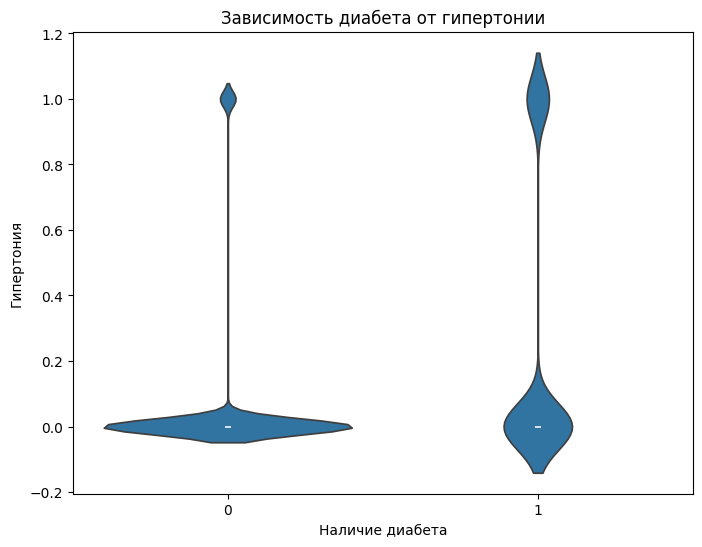

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='hypertension', data=data_raw)
plt.ylabel('Гипертония')
plt.xlabel('Наличие диабета')
plt.title('Зависимость диабета от гипертонии')
pass

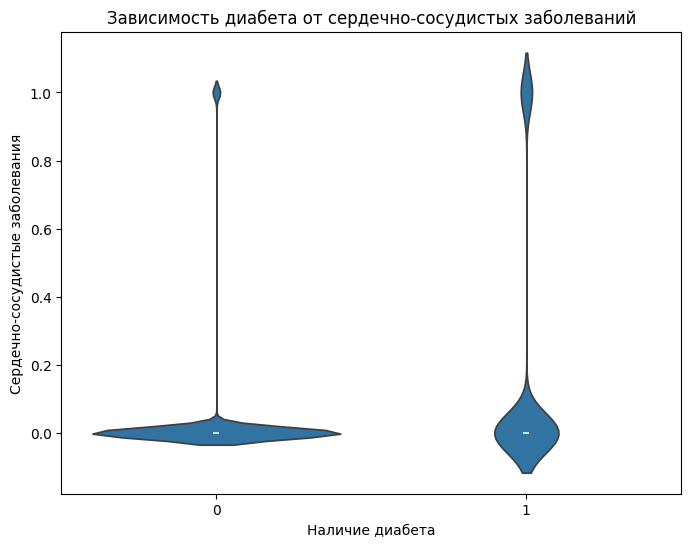

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='heart_disease', data=data_raw)
plt.ylabel('Сердечно-сосудистые заболевания')
plt.xlabel('Наличие диабета')
plt.title('Зависимость диабета от сердечно-сосудистых заболеваний')
pass

In [ ]:
corr_mat.loc['diabetes', 'hypertension'], corr_mat.loc['diabetes', 'heart_disease']

(np.float64(0.1978232464080493), np.float64(0.17172684954884787))

Также можно заметить зависимость индекса массы тела от возраста.

In [ ]:
corr_mat.loc['bmi', 'age']

np.float64(0.33739577618616956)

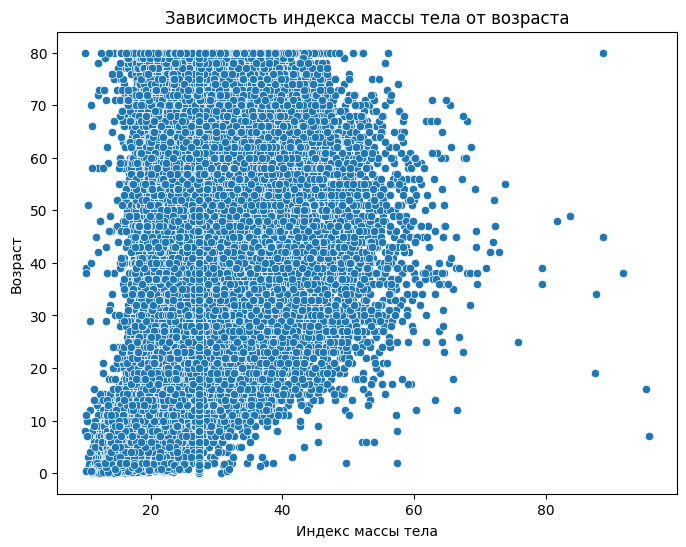

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='age', data=data_raw, alpha=1)
plt.xlabel('Индекс массы тела')
plt.ylabel('Возраст')
plt.title('Зависимость индекса массы тела от возраста')
pass

**3. Обработка пропущенных значений**

In [7]:
data_raw.isnull()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Количество пропущенных значений:

In [8]:
data_raw.isnull().sum()

,0
year,0
gender,18
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


Названия столбцов, в которых есть пропущенные значения:

In [9]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 0]

['gender', 'smoking_history']

Пропущенные значения можно заполнить медианой или средним (для количественных признаков) или модой (для номинальных признаков).

Так как `'gender'` и `'smoking_history'` это катигориальные признаки, то заполняем их модой:

In [10]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data_raw[['gender', 'smoking_history']])

SimpleImputer(strategy='most_frequent')

In [11]:
data_raw[['gender', 'smoking_history']] = imp_cat.transform(data_raw[['gender', 'smoking_history']])

Теперь можно убедиться, что пропущенных значений нет:

In [12]:
data_raw.isna().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


**4. Обработка категориальных признаков**

Обработка:

Бинарный признак `'gender'` можно заменить на числовой: `'Male'` -> 0, `'Female'` -> 1.

Признак `'smoking_history'` принимает 5 значений: `'current'`, `'ever'`, `'former'`, `'never'`, `'not current'`.

Можно заменить признак `'smoking_history'` на 5 новых признаков, которые будут называться `'smoking_history_current'`, `'smoking_history_ever'`, `'smoking_history_former'`, `'smoking_history_never'`, `'smoking_history_not_current'`. При этом
- если признак `'smoking_history'` принимает значение `'current'`, то признак `'smoking_history_current'` равен 1, а все остальные 0;
- если признак `'smoking_history'` принимает значение `'ever'`, то признак `'smoking_history_ever'` равен 1, а все остальные 0
- и т.д.

In [13]:
data_raw['gender'] = data_raw['gender'].map({'Female': 1, 'Male': 0})
data_raw['gender']

,gender
0,1
1,1
2,0
3,0
4,1
...,...
99995,1
99996,1
99997,0
99998,1


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
data_raw_smoking = pd.DataFrame(data_raw['smoking_history'])
enc.fit(data_raw_smoking)

OneHotEncoder(drop='if_binary', sparse_output=False)

In [15]:
dummies = pd.DataFrame(enc.transform(data_raw_smoking),
                       columns=enc.get_feature_names_out(), index=data_raw.index)
dummies.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [16]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop('smoking_history', axis=1)
data_raw = data_raw.rename(columns={'smoking_history_not current': 'smoking_history_not_current'})
data_raw

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current
0,2020,1,32.0,Alabama,0,0,0,0,1,0,0,27.32,5.0,100,0,0.0,0.0,0.0,1.0,0.0
1,2015,1,29.0,Alabama,0,1,0,0,0,0,0,19.95,5.0,90,0,0.0,0.0,0.0,1.0,0.0
2,2015,0,18.0,Alabama,0,0,0,0,1,0,0,23.76,4.8,160,0,0.0,0.0,0.0,1.0,0.0
3,2015,0,41.0,Alabama,0,0,1,0,0,0,0,27.32,4.0,159,0,0.0,0.0,0.0,1.0,0.0
4,2016,1,52.0,Alabama,1,0,0,0,0,0,0,23.75,6.5,90,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,33.0,Wyoming,0,0,0,0,1,0,0,21.21,6.5,90,0,0.0,0.0,0.0,1.0,0.0
99996,2016,1,80.0,Wyoming,0,1,0,0,0,0,0,36.66,5.7,100,0,0.0,0.0,0.0,1.0,0.0
99997,2018,0,46.0,Wyoming,0,1,0,0,0,0,0,36.12,6.2,158,0,0.0,1.0,0.0,0.0,0.0
99998,2018,1,51.0,Wyoming,1,0,0,0,0,0,0,29.29,6.0,155,0,0.0,0.0,0.0,0.0,1.0


**5. Нормализация**

Выполним стандартизацию всех признаков:

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_data = data_raw[['year', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level']].copy()
scaler = StandardScaler()
scaler.fit(norm_data)
norm_data = pd.DataFrame(scaler.transform(norm_data), columns=norm_data.columns, index=norm_data.index)

In [18]:
norm_data.describe()

,year,age,bmi,hbA1c_level,blood_glucose_level
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-7.685458e-14,-1.743672e-16,8.993339e-16,-2.842171e-18,-2.827250e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.498320e+00,-1.856658e+00,-2.608320e+00,-1.893686e+00,-1.426210e+00
25%,4.751448e-01,-7.943364e-01,-5.561106e-01,-6.794897e-01,-9.349053e-01
50%,4.751448e-01,4.948073e-02,-1.155837e-04,2.545078e-01,4.770422e-02
75%,4.751448e-01,8.044750e-01,3.404125e-01,6.281067e-01,5.144437e-01
max,2.705244e+00,1.692704e+00,1.030161e+01,3.243300e+00,3.978142e+00


In [19]:
norm_data

,year,age,bmi,hbA1c_level,blood_glucose_level
0,1.218511,-0.439045,-0.000116,-0.492690,-0.934905
1,-2.498320,-0.572279,-1.110599,-0.492690,-1.180558
2,-2.498320,-1.060805,-0.536523,-0.679490,0.539009
3,-2.498320,-0.039342,-0.000116,-1.426688,0.514444
4,-1.754954,0.449184,-0.538029,0.908306,-1.180558
...,...,...,...,...,...
99995,-0.268221,-0.394634,-0.920747,0.908306,-1.180558
99996,-1.754954,1.692704,1.407200,0.161108,-0.934905
99997,-0.268221,0.182715,1.325835,0.628107,0.489878
99998,-0.268221,0.404772,0.296716,0.441307,0.416183


In [20]:
data_raw = data_raw.drop(['year', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level'], axis=1)
data_raw = pd.concat((data_raw, norm_data), axis=1)
data_raw

,gender,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current,year,age,bmi,hbA1c_level,blood_glucose_level
0,1,Alabama,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1.218511,-0.439045,-0.000116,-0.492690,-0.934905
1,1,Alabama,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-2.498320,-0.572279,-1.110599,-0.492690,-1.180558
2,0,Alabama,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,-2.498320,-1.060805,-0.536523,-0.679490,0.539009
3,0,Alabama,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-2.498320,-0.039342,-0.000116,-1.426688,0.514444
4,1,Alabama,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-1.754954,0.449184,-0.538029,0.908306,-1.180558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,Wyoming,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,-0.268221,-0.394634,-0.920747,0.908306,-1.180558
99996,1,Wyoming,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-1.754954,1.692704,1.407200,0.161108,-0.934905
99997,0,Wyoming,0,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,-0.268221,0.182715,1.325835,0.628107,0.489878
99998,1,Wyoming,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.268221,0.404772,0.296716,0.441307,0.416183


**6. Разбиение данных на обучающую и тестовую выборки**

Для предсказания диабета буду использовать все входные признаки, кроме year.

In [21]:
X = data_raw.drop(['diabetes', 'year', 'location'], axis=1)
y = data_raw['diabetes']

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
type(y)

pandas.core.series.Series

Разбиваем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test,  d = X_test.shape

N_train, N_test, d

(75000, 25000, 17)

**7. Обучение**

**Метод k ближайших соседей (kNN):**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
accuracy_train = knn.score(X_train, y_train)
print(f"Точность модели на обучающей выборке: {accuracy_train}")
err_train = 1 - accuracy_train
print(f"Ошибка на обучающей выборке: {err_train}")
accuracy_test = knn.score(X_test, y_test)
print(f"Точность модели на тестовой выборке: {accuracy_test}")
err_test = 1 - accuracy_test
print(f"Ошибка на тестовой выборке: {err_test}")

Точность модели на обучающей выборке: 0.96184
Ошибка на обучающей выборке: 0.03815999999999997
Точность модели на тестовой выборке: 0.95872
Ошибка на тестовой выборке: 0.04127999999999998


**Подбор оптимального значения количества ближайших соседей:**

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(f"Лучшее значение k: {best_n_neighbors}")
print(f"Точность модели на тестовой выборке: {grid.best_score_}")
print(f"Ошибка на тестовой выборке: {best_cv_err}")

Лучшее значение k: 15
Точность модели на тестовой выборке: 0.9598133333333333
Ошибка на тестовой выборке: 0.040186666666666704


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Точность модели на обучающей выборке: 0.9615733333333334
Ошибка на обучающей выборке: 0.038426666666666665
Точность модели на тестовой выборке: 0.95916
Ошибка на тестовой выборке: 0.04084


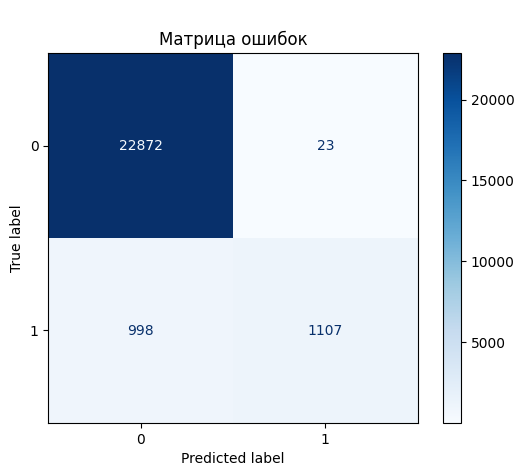

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
accuracy_train = 1 - err_train
accuracy_test = 1 - err_test
print(f"Точность модели на обучающей выборке: {accuracy_train}")
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Точность модели на тестовой выборке: {accuracy_test}")
print(f"Ошибка на тестовой выборке: {err_test}")

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('\nМатрица ошибок')
plt.show()


При значении гиперпараметра k=15 достигается наименьшая ошибка на тестовой выборке.

**Random Forest:**

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

accuracy_train = 1 - err_train
accuracy_test = 1 - err_test
print(f"Точность модели на обучающей выборке: {accuracy_train}")
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Точность модели на тестовой выборке: {accuracy_test}")
print(f"Ошибка на тестовой выборке: {err_test}")

Точность модели на обучающей выборке: 0.9997066666666666
Ошибка на обучающей выборке: 0.0002933333333333333
Точность модели на тестовой выборке: 0.97044
Ошибка на тестовой выборке: 0.02956


**Extremely Randomized Trees:**

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

accuracy_train = 1 - err_train
accuracy_test = 1 - err_test
print(f"Точность модели на обучающей выборке: {accuracy_train}")
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Точность модели на тестовой выборке: {accuracy_test}")
print(f"Ошибка на тестовой выборке: {err_test}")

Точность модели на обучающей выборке: 0.9997066666666666
Ошибка на обучающей выборке: 0.0002933333333333333
Точность модели на тестовой выборке: 0.96752
Ошибка на тестовой выборке: 0.03248


**GBT:**

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

accuracy_train = 1 - err_train
accuracy_test = 1 - err_test
print(f"Точность модели на обучающей выборке: {accuracy_train}")
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Точность модели на тестовой выборке: {accuracy_test}")
print(f"Ошибка на тестовой выборке: {err_test}")

Точность модели на обучающей выборке: 0.9764666666666667
Ошибка на обучающей выборке: 0.023533333333333333
Точность модели на тестовой выборке: 0.97048
Ошибка на тестовой выборке: 0.02952


**8. Борьба с несбалансированностью классов**

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Распределение классов до SMOTE: {np.bincount(y_train)}")
print(f"Распределение классов после SMOTE: {np.bincount(y_train_smote)}")

knn_smote = KNeighborsClassifier(n_neighbors=15)
knn_smote.fit(X_train_smote, y_train_smote)

y_test_pred_knn_smote = knn_smote.predict(X_test)

accuracy_train_knn_smote = knn_smote.score(X_train_smote, y_train_smote)
err_train_knn_smote = 1 - accuracy_train_knn_smote
accuracy_test_knn_smote = knn_smote.score(X_test, y_test)
err_test_knn_smote = 1 - accuracy_test_knn_smote

print(f"\nТочность KNN на обучающей выборке: {accuracy_train_knn_smote}")
print(f"Ошибка KNN на обучающей выборке: {err_train_knn_smote}")
print(f"Точность KNN на тестовой выборке: {accuracy_test_knn_smote}")
print(f"Ошибка KNN на тестовой выборке: {err_test_knn_smote}")

rf_smote = ensemble.RandomForestClassifier(n_estimators=1000, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_test_pred_rf_smote = rf_smote.predict(X_test)

accuracy_train_rf_smote = rf_smote.score(X_train_smote, y_train_smote)
err_train_rf_smote = 1 - accuracy_train_rf_smote
accuracy_test_rf_smote = rf_smote.score(X_test, y_test)
err_test_rf_smote = 1 - accuracy_test_rf_smote

print(f"\nТочность Random Forest на обучающей выборке: {accuracy_train_rf_smote}")
print(f"Ошибка Random Forest на обучающей выборке: {err_train_rf_smote}")
print(f"Точность Random Forest на тестовой выборке: {accuracy_test_rf_smote}")
print(f"Ошибка Random Forest на тестовой выборке: {err_test_rf_smote}")

gbt_smote = ensemble.GradientBoostingClassifier(n_estimators=1000, random_state=42)
gbt_smote.fit(X_train_smote, y_train_smote)

y_test_pred_gbt_smote = gbt_smote.predict(X_test)

accuracy_train_gbt_smote = gbt_smote.score(X_train_smote, y_train_smote)
err_train_gbt_smote = 1 - accuracy_train_gbt_smote
accuracy_test_gbt_smote = gbt_smote.score(X_test, y_test)
err_test_gbt_smote = 1 - accuracy_test_gbt_smote

print(f"\nТочность Gradient Boosting на обучающей выборке: {accuracy_train_gbt_smote}")
print(f"Ошибка Gradient Boosting на обучающей выборке: {err_train_gbt_smote}")
print(f"Точность Gradient Boosting на тестовой выборке: {accuracy_test_gbt_smote}")
print(f"Ошибка Gradient Boosting на тестовой выборке: {err_test_gbt_smote}")

Распределение классов до SMOTE: [68605  6395]
Распределение классов после SMOTE: [68605 68605]

Точность KNN на обучающей выборке: 0.9419575832665258
Ошибка KNN на обучающей выборке: 0.05804241673347421
Точность KNN на тестовой выборке: 0.88872
Ошибка KNN на тестовой выборке: 0.11128000000000005

Точность Random Forest на обучающей выборке: 0.9998396618322279
Ошибка Random Forest на обучающей выборке: 0.00016033816777205612
Точность Random Forest на тестовой выборке: 0.95844
Ошибка Random Forest на тестовой выборке: 0.04156000000000004

Точность Gradient Boosting на обучающей выборке: 0.9849427884264995
Ошибка Gradient Boosting на обучающей выборке: 0.015057211573500484
Точность Gradient Boosting на тестовой выборке: 0.97196
Ошибка Gradient Boosting на тестовой выборке: 0.028039999999999954


**9. Исключение коррелированных переменных**

Коррелированные переменные необходимо исключать для устранения проблем, связанных с избыточностью данных, так как они несут одну и ту же информацию.

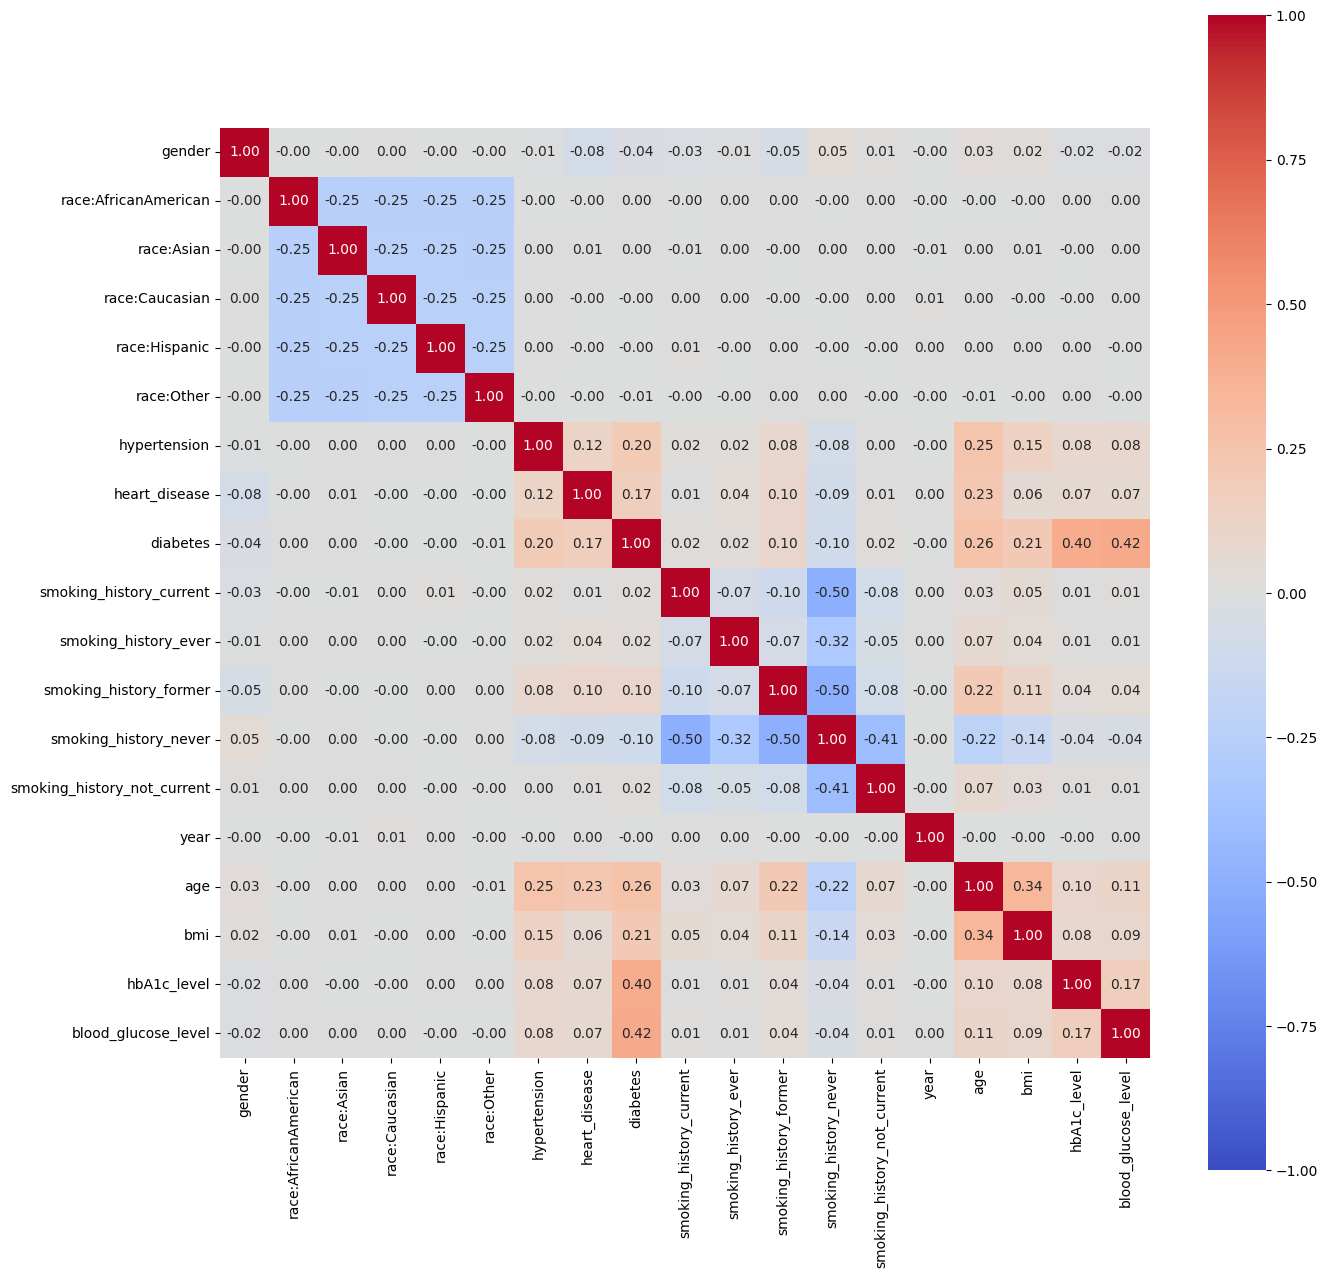

In [ ]:
corr_mat = data_raw.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [ ]:
threshold=0.8

corr_matrix = data_raw.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
df_clean = data_raw.drop(columns=to_drop)

print(f"Удалено {len(to_drop)} переменных")
print(f"Осталось {len(df_clean.columns)} переменных")

Удалено 0 переменных
Осталось 20 переменных


В данном датасете нет сильной корреляции между переменными, поэтому ничего исключать не нужно.

**10. Выводы**

В данной работе был рассмотрен датасет, содержащий данные о здоровье 100000 людей. На его основе были вычисленны основные характеристики, визуализированы данные и построена модель классификации для предсказания наличия диабета. Также были обработаны пропущенные значения и категориальные признаки, проведена нормализация. Для решения задачи классификации была выбрана модель kNN. Для kNN было подобрано оптимальное значение гиперпараметра k=15. Дополнительно были запущены классификаторы Random Forest, Extremely Randomized Trees и GBT.

Точность kNN (k=15): 0.95916

Точность Random Forest: 0.97044

Точность Extremely Randomized Trees: 0.96752

Точность GBT: 0.97048

Лучшие результаты показали модели Random Forest и GBT.